# Einstiegsbeispiel lineare Ausgleichsrechnung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Gegeben seien die Messdaten

$$\begin{array}{c|cccccc}
t & 0 & 1 & 2 & 3 & 4 & 5 \\\hline
 y & \frac{1}{2} & \frac{3}{4} & \frac{9}{10} & \frac{19}{20} & \frac{33}{34} & \frac{51}{52}\\
\end{array}$$

mit einer vermuteten Gesetzmässigkeit der Form

$$y = b(t) = \alpha \frac{1}{1+t^2} + \beta.$$

In [2]:
t = np.arange(6)
y = np.array([1/2,3/4,9/10,19/20,33/34,51/52])

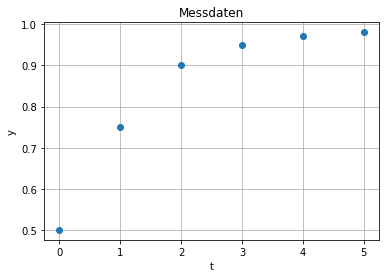

In [3]:
plt.plot(t,y,'o')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Messdaten')
plt.grid()
plt.show()

## Systemmatrix

Die beiden Basisfunktionen sind gegeben durch

$$u_1(t) = \frac{1}{1+t^2},\quad u_2(t) \equiv 1.$$

Sei

$$\mathbf{u}(t) = [u_1(t), u_2(t)].$$

In [4]:
def u1(t):
    return 1/(1+t**2)
def u2(t):
    return np.ones_like(t)

def u(t):
    return np.array([u1(t), u2(t)]).T

Die Systemmatrix $A$ ist somit gegeben durch

In [5]:
A = u(t)
A

array([[1.        , 1.        ],
       [0.5       , 1.        ],
       [0.2       , 1.        ],
       [0.1       , 1.        ],
       [0.05882353, 1.        ],
       [0.03846154, 1.        ]])

Im Skirpt wird als wichtiges Beispiel einer symmetrisch positiv definiten Matrix die Matrix

$$A^T\cdot A$$

erwähnt, wobei die Spalten von $A$ linear unabhängig sein müssen.

In [6]:
A.T@A

array([[1.3049395 , 1.89728507],
       [1.89728507, 6.        ]])

Der kleineste Eigenwert von $A^T\cdot A$ ist gegeben durch

In [7]:
from scipy.linalg import eigvals

# Berechnung der Eigenwerte
eig = eigvals(A.T@A)
np.real(eig)

array([0.63409454, 6.67084496])

Im Beispiel ist wie zu erwarten, der kleinste Eigenwert strikt positiv:

In [8]:
np.min(eig)

(0.6340945386372852+0j)

**Bemerkung**: Die Ansatz- oder Basisfunktionen müssen linearunabhängig sein. Ist dies nicht der Fall, bringen wir keine Mehrinformation ins System.

Es stellt sich die Frage: *Wie macht sich das in der Numerik sichtbar?*

Wir betrachten die Erweiterung unserer Ansatzfunktionen mit dem Vielfachen von $u_1$:

In [9]:
def v(t):
    return np.array([u1(t), 2*u1(t), u2(t)]).T

Damit folgt die Systemmatrix

In [10]:
A2 = v(t)
A2

array([[1.        , 2.        , 1.        ],
       [0.5       , 1.        , 1.        ],
       [0.2       , 0.4       , 1.        ],
       [0.1       , 0.2       , 1.        ],
       [0.05882353, 0.11764706, 1.        ],
       [0.03846154, 0.07692308, 1.        ]])

Berechnet man wiederum die Matrix $A_2^T\cdot A_2$:

In [11]:
A2.T@A2

array([[1.3049395 , 2.609879  , 1.89728507],
       [2.609879  , 5.21975799, 3.79457014],
       [1.89728507, 3.79457014, 6.        ]])

und ihre Eigenwerte:

In [12]:
np.real(eigvals(A2.T@A2))

array([1.05129111e+01, 5.34476731e-16, 2.01178643e+00])

so ist der kleinste Eigenwert $5\cdot 10^{-16}$, also numerisch Null! In den seltensten Fälle steht an dieser Stelle einfach 0. **Wir als Anwender müssen daher immer das Resultat vorsichtig interpretieren.**

## Loesen der Normalgleichungen

Da die Matrix $A^T A$ symmetrisch positiv definit ist, ergibt sich für die Lösung des linearen Ausgleichsproblems folgende Methode:

- Berechne $A^T A$, $A^T b$.

In [13]:
ATA = A.T@A
ATA

array([[1.3049395 , 1.89728507],
       [1.89728507, 6.        ]])

In [14]:
ATb = A.T@y
ATb

array([1.24481532, 5.05135747])

- Berechne die Cholesky-Zerlegung
$$L L^T = A^TA$$
von $A^T A$.

In [15]:
from scipy.linalg import cholesky

In [16]:
L = cholesky(ATA,lower = True)
L

array([[1.14233948, 0.        ],
       [1.66087673, 1.80041342]])

- Löse
$$L z = A^T b,\quad L^T x = z$$
durch Vorwärts, bzw. Rückwärtseinsetzen.

In [17]:
from scipy.linalg import solve_triangular

In [18]:
z = solve_triangular(L,ATb,lower = True)
x = solve_triangular(L.T,z,lower = False)
x

array([-0.5,  1. ])

Die Reihenfolge der Koeffizienten korrespondiert mit der Reihenfolge der gewählten Ansatz- / Basisfunktion.

Es folgt

$$y(t) = -0.5\,u_1(t) + 1\,u_2(t).$$

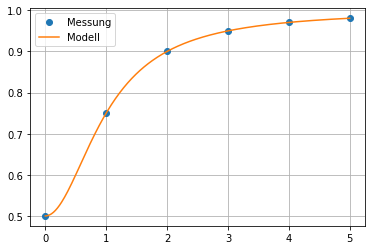

In [19]:
tp = np.linspace(0,5,300)
Atp = u(tp)
plt.plot(t,y,'o',label='Messung')
plt.plot(tp, Atp@x,label='Modell')
plt.legend()
plt.grid()
plt.savefig('ExmpLinRegression3.pdf')
plt.show()